In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This method allows you to upload files directly from your local machine into Colab.
# Once you run `files.upload()`, a file selector will appear below the cell — select your CSV file.
# After upload, the file will be temporarily stored in the Colab session.
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd

# Load dataset (Assuming file is uploaded or mounted)
df = pd.read_csv('insurance.csv')

# Preview first 5 rows of the dataset
print(df.head())

# Check dataset structure, columns, and data types
print(df.info())

# Check for missing values in the dataset
print(df.isnull().sum())


Saving insurance.csv to insurance (1).csv
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
childre

In [4]:
# Import LabelEncoder for categorical encoding
from sklearn.preprocessing import LabelEncoder

# Encode 'sex' column: male=1, female=0
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

# Encode 'smoker' column: yes=1, no=0
le_smoker = LabelEncoder()
df['smoker'] = le_smoker.fit_transform(df['smoker'])

# Encode 'region' column using one-hot encoding, drop first to avoid dummy variable trap
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Define features (X) and target (y)
X = df.drop('charges', axis=1)  # All columns except 'charges'
y = df['charges']               # Target variable


In [5]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict charges on test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


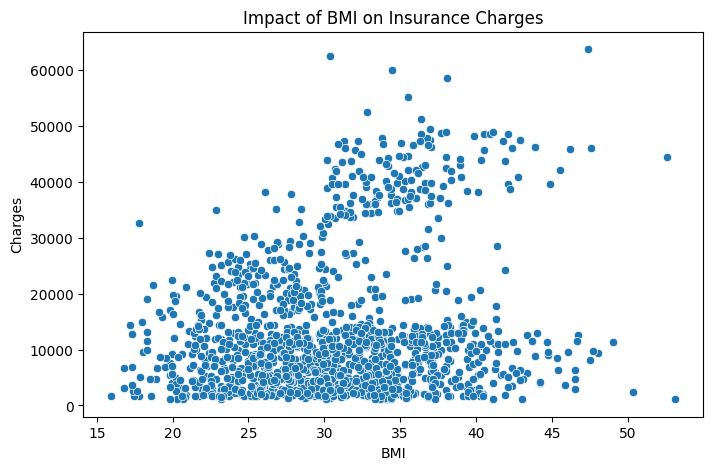

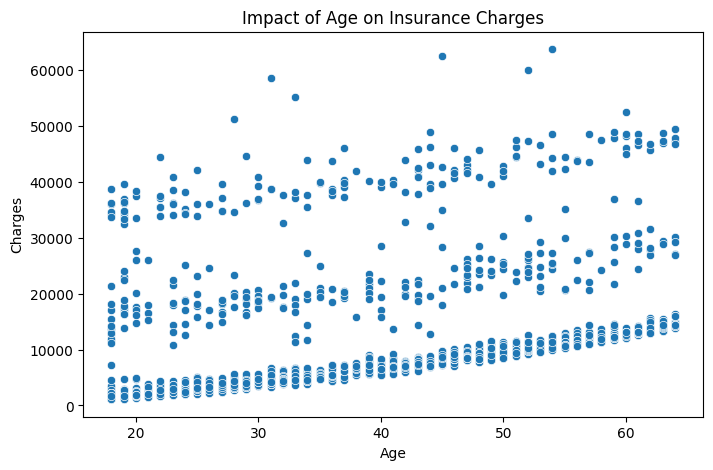

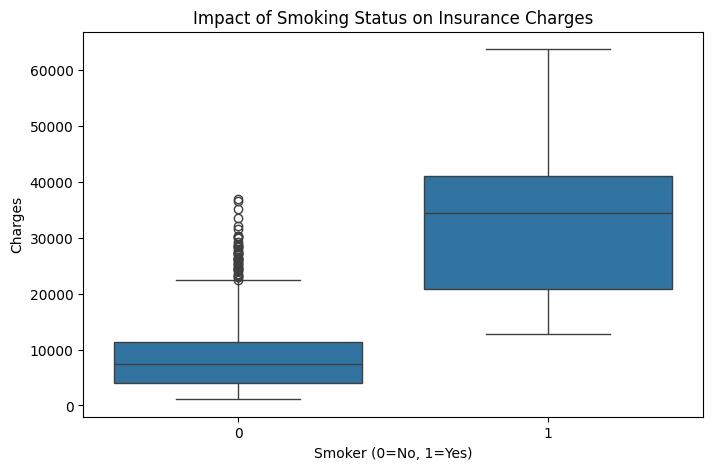

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize relationship between BMI and Charges
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['bmi'], y=df['charges'])
plt.title('Impact of BMI on Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Visualize relationship between Age and Charges
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['charges'])
plt.title('Impact of Age on Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Visualize impact of smoking status on charges using boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['smoker'], y=df['charges'])
plt.title('Impact of Smoking Status on Insurance Charges')
plt.xlabel('Smoker (0=No, 1=Yes)')
plt.ylabel('Charges')
plt.show()
